In [1]:
# libraries
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")


# Maths into Data Science and AI - Lesson 9
## Clustering algorithm: K-means

The data for this notebook is of "Mall customers"

There are 200 customers in the data set each with the following attributes
* **Age** in years
* **Annual Income** in thousands of dollars
* **Spending Score** a score between 1 and 100 given by the Mall based on the behaviour and spending of the customer



In [2]:
# import the data
mall_data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

# display the data set to check
mall_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Data exploration

Which pair of features appears to show clusters appearing in the data?

In [3]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


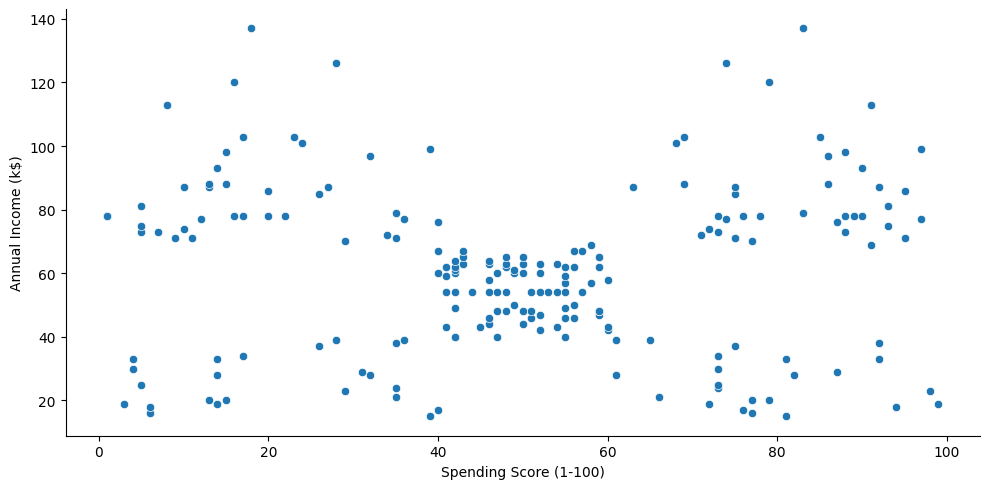

In [4]:
# scatter plot for Spending score and Annual income
sns.relplot(data=mall_data,kind='scatter',x='Spending Score (1-100)',y='Annual Income (k$)', aspect=2);

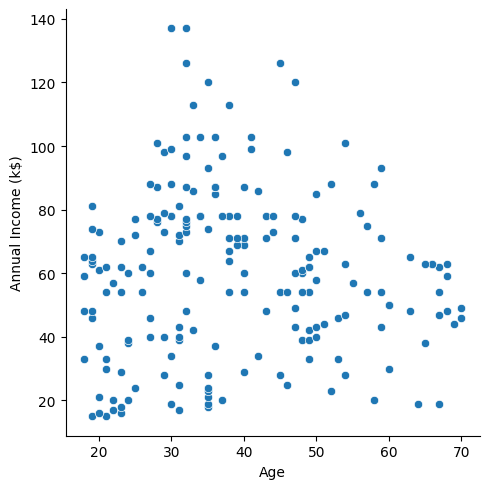

In [5]:
# scatter plot for Age and Annual Income
sns.relplot(data=mall_data,kind='scatter',x='Age',y='Annual Income (k$)');

# Task

The data for this task is 200 customers at a shopping mall
Use the notebook to find the model with the largest silhouette score by:
* changing the input features
* changing the number of means

What names would you give the groups in your ‘best’ model?
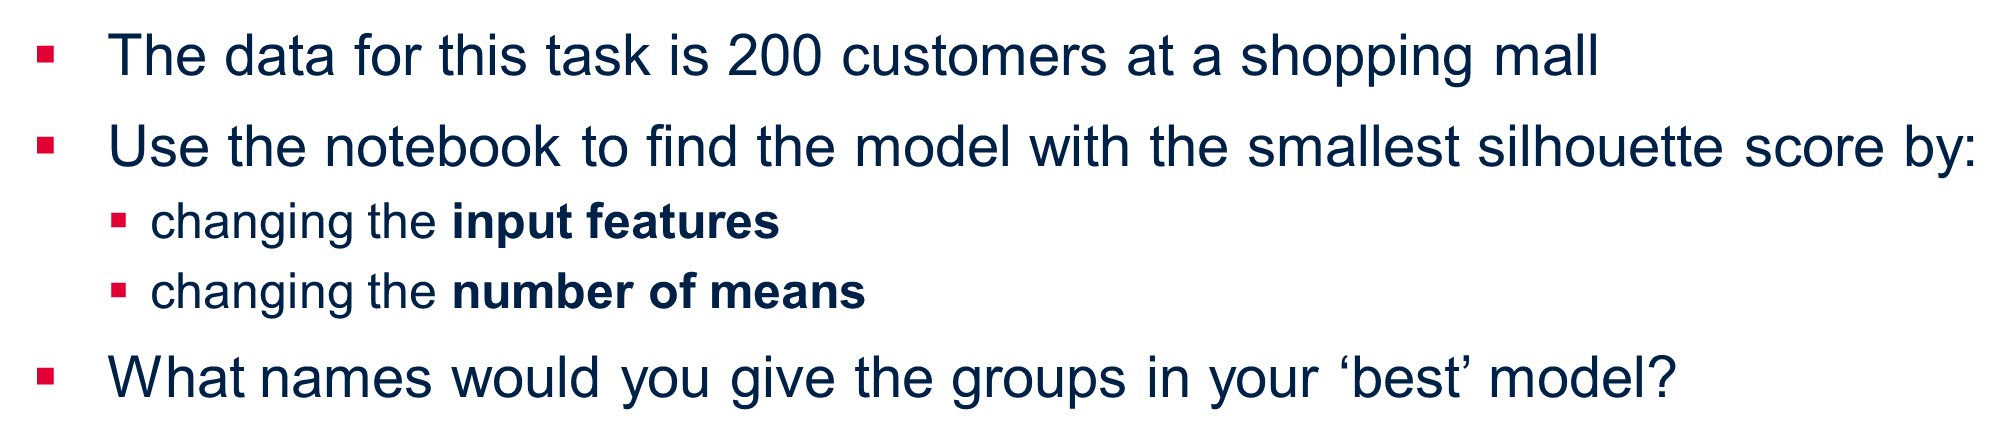
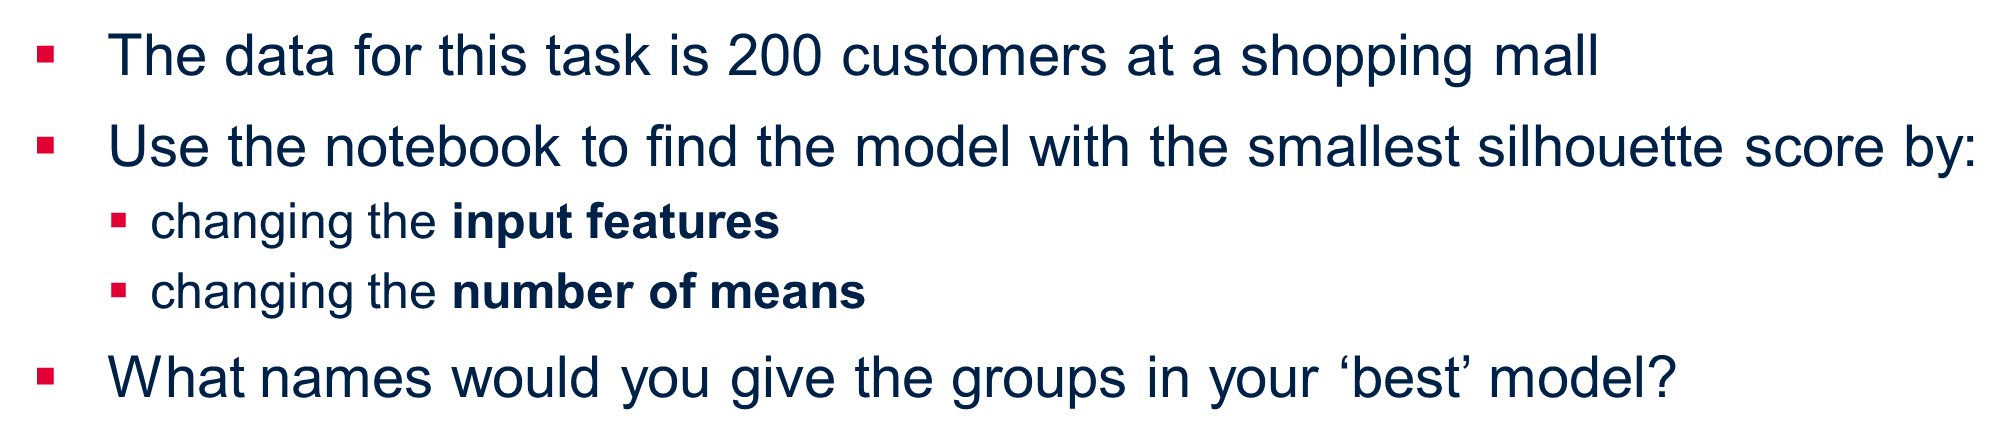
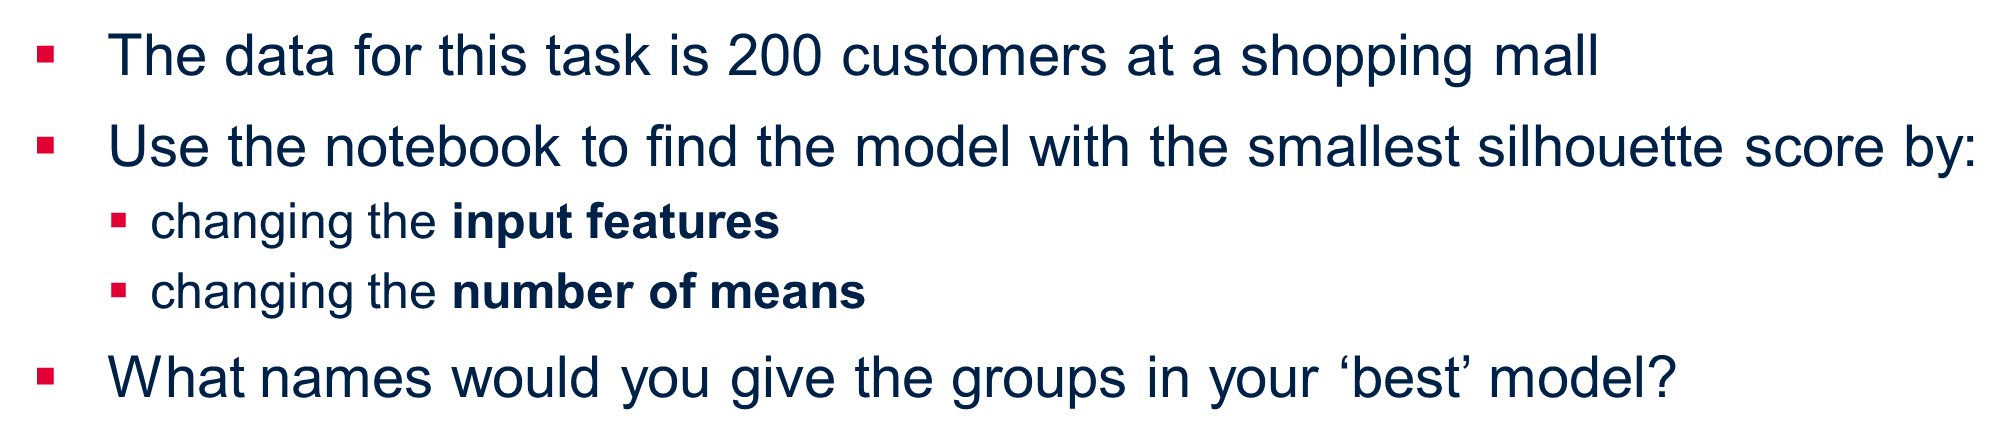
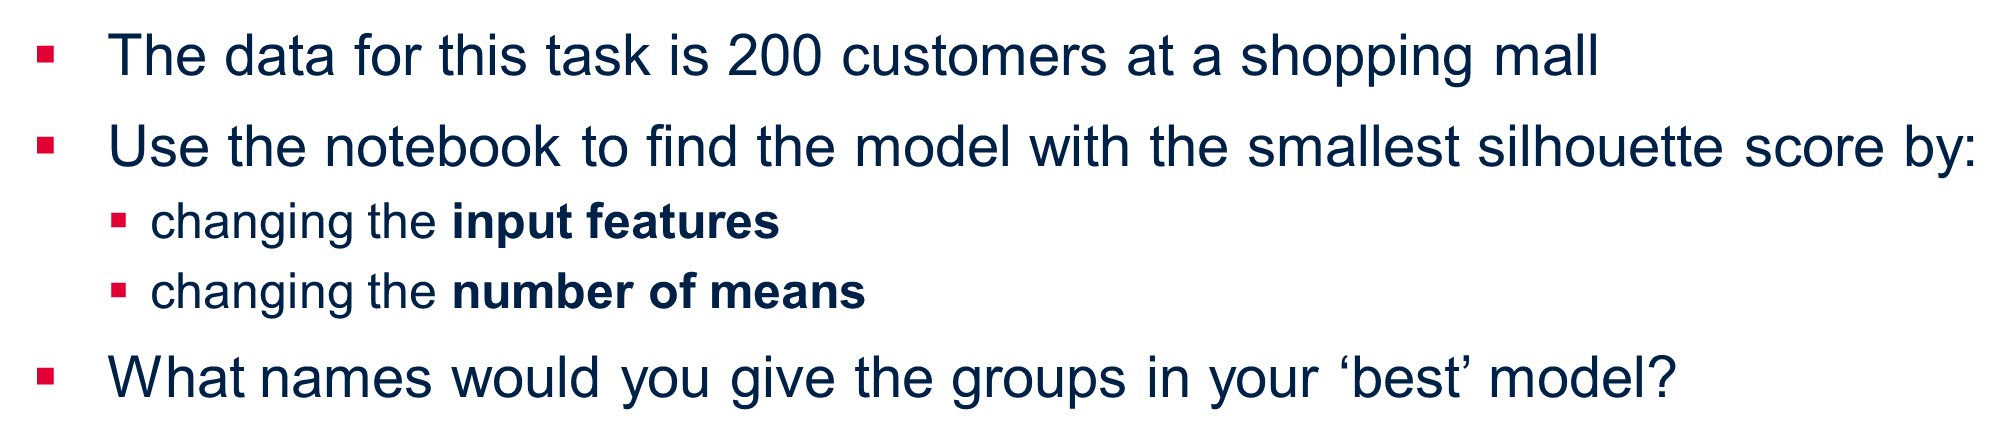

Centres:  [[35.13 82.42]
 [42.22 40.78]]
Silhouette Score:  0.4262


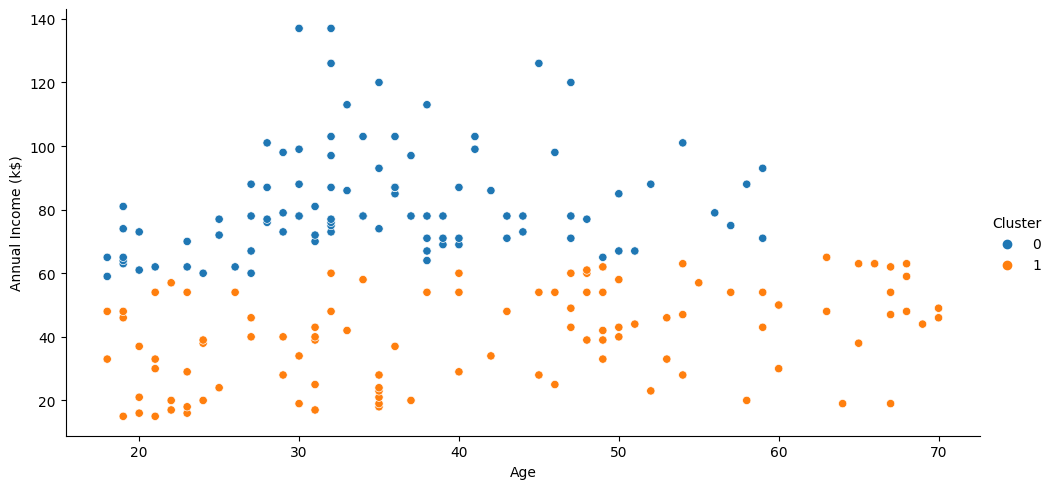

In [6]:
# input features
input_features = ['Age','Annual Income (k$)']
features = mall_data[input_features].copy()
 
# Create the model and add labels
model = KMeans(n_clusters=2, random_state=1)
model.fit(features)
features['Cluster'] = model.labels_
print("Centres: ",model.cluster_centers_.round(2))
 
# Show show the metric and scatter diagram
print("Silhouette Score: ", round(silhouette_score(features[input_features], model.labels_),4))
sns.relplot(data=features, x=input_features[0],y=input_features[1], hue='Cluster', palette='tab10',aspect=2);

# Extending to more than 2 features

The code below will allow you to visualise more than 2 features on the scatter graph by finding the "principal components" and plotting these.

The principal components are the features with the largest variation in the input

Silhouette Score:  0.3841
[[40.39 87.   18.63]
 [40.33 44.15 49.83]
 [32.69 86.54 82.13]]


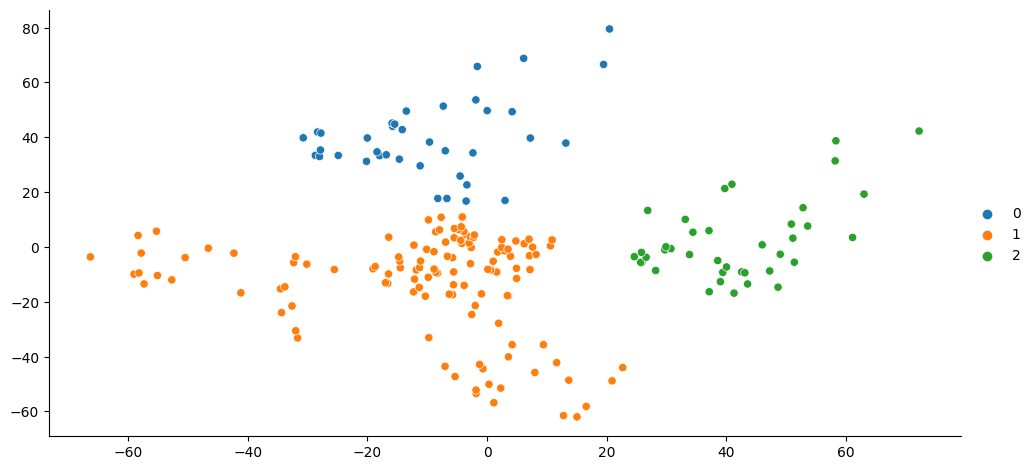

In [7]:
# input features
input_features = ['Age','Annual Income (k$)','Spending Score (1-100)']
features = mall_data[input_features].copy()

# Create the model and add labels
model = KMeans(n_clusters=3, random_state=1)
model.fit(features)
features['Cluster'] = model.labels_

# Print the metrics and centres
print("Silhouette Score: ", round(silhouette_score(features, model.labels_),4))
print(model.cluster_centers_.round(2))

# 2D visualisation ('Principal components' are found and then shown in 2D)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)
sns.relplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=model.labels_, palette='tab10', aspect=2);
